In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import EngFormatter

plt.rcParams.update({'font.size': 12})

In [2]:
def create_graph(title, df, df2, xdata, filename, legend = True):
	fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 3))  # figsize adjusts width and height
	fig.suptitle(title, fontsize=16)
	# First plot
	ax1.plot(list(df[xdata]), df["Operation Time Python"] / 1000, label = "Python (pessimistic)", marker='o', linestyle='-', color='red')
	ax1.plot(list(df[xdata]), df["Operation Time LHF"] / 1000, label = "LHF (pessimistic)", marker='o', linestyle='-', color='orange')
	ax1.plot(list(df2[xdata]), df2["Operation Time Python"] / 1000, label = "Python (optimistic)", marker='o', linestyle='-', color='blue')
	ax1.plot(list(df2[xdata]), df2["Operation Time LHF"] / 1000, label = "LHF (optimistic)", marker='o', linestyle='-', color='green')
	#ax1.plot(list(df[xdata]), df["Operation Time Naive"] / 1000, label = "Naive", marker='o', linestyle='-', color='y')
	ax1.xaxis.set_major_formatter(EngFormatter())
	ax1.yaxis.set_major_formatter(EngFormatter())
	#ax1.set_yscale('log')
	ax1.set_title('Cumul. Time Taken For Operations')
	ax1.set_xlabel('Operation Count')
	ax1.set_ylabel('Time (sec)')
	ax1.grid(True)
	# ax1.legend()

	# Second plot
	ax2.plot(list(df[xdata]), df["PMU Python"] * 1000, label = "Python (random)", marker='o', linestyle='-', color='red')
	ax2.plot(list(df[xdata]), df["PMU LHF"] * 1000, label = "LHF (random)", marker='o', linestyle='-', color='orange')
	ax2.plot(list(df2[xdata]), df2["PMU Python"] * 1000, label = "Python (optimistic)", marker='o', linestyle='-', color='blue')
	ax2.plot(list(df2[xdata]), df2["PMU LHF"] * 1000, label = "LHF (optimistic)", marker='o', linestyle='-', color='green')
	#ax2.plot(list(df[xdata]), df["PMU Naive"] * 1000, label = "Naive", marker='o', linestyle='-', color='y')
	ax2.xaxis.set_major_formatter(EngFormatter())
	ax2.yaxis.set_major_formatter(EngFormatter(unit="B"))
	#ax2.set_yscale('log')
	ax2.set_title('Peak Memory Usage (PMU)')
	ax2.set_xlabel('Operation Count')
	ax2.set_ylabel('Max RSS in Lifetime (KB)')
	ax2.grid(True)
	# ax2.legend()

	if legend:
		handles, labels = ax1.get_legend_handles_labels()
		fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=4)
	
	# Adjust layout so titles/labels don’t overlap
	plt.tight_layout()

	# Display the plots
	fig.savefig(f"{filename}.svg", format='svg', dpi=300, bbox_inches = "tight")
	fig.savefig(f"{filename}.pdf", format='pdf', dpi=300, bbox_inches = "tight")
	# Display SVG inline
	display(f"{filename}.svg")

In [3]:
def create_graph_naive(title, df, df2, xdata, filename, legend = True):
	fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 3))  # figsize adjusts width and height
	fig.suptitle(title, fontsize=16)
	# First plot
	ax1.plot(list(df[xdata]), df["Operation Time Python"] / 1000, label = "Python (pessimistic)", marker='o', linestyle='-', color='red')
	ax1.plot(list(df[xdata]), df["Operation Time LHF"] / 1000, label = "LHF (pessimistic)", marker='o', linestyle='-', color='orange')
	ax1.plot(list(df2[xdata]), df2["Operation Time Python"] / 1000, label = "Python (optimistic)", marker='o', linestyle='-', color='blue')
	ax1.plot(list(df2[xdata]), df2["Operation Time LHF"] / 1000, label = "LHF (optimistic)", marker='o', linestyle='-', color='green')
	ax1.plot(list(df[xdata]), df["Operation Time Naive"] / 1000, label = "Naive (pessimistic)", marker='o', linestyle='-', color='purple')
	ax1.plot(list(df2[xdata]), df2["Operation Time Naive"] / 1000, label = "Naive (optimistic)", marker='o', linestyle='-', color='magenta')
	ax1.xaxis.set_major_formatter(EngFormatter())
	ax1.yaxis.set_major_formatter(EngFormatter())
	#ax1.set_yscale('log')
	ax1.set_title('Cumul. Time Taken For Operations')
	ax1.set_xlabel('Operation Count')
	ax1.set_ylabel('Time (sec)')
	ax1.grid(True)
	# ax1.legend()

	# Second plot
	ax2.plot(list(df[xdata]), df["PMU Python"] * 1000, label = "Python (random)", marker='o', linestyle='-', color='red')
	ax2.plot(list(df[xdata]), df["PMU LHF"] * 1000, label = "LHF (random)", marker='o', linestyle='-', color='orange')
	ax2.plot(list(df2[xdata]), df2["PMU Python"] * 1000, label = "Python (optimistic)", marker='o', linestyle='-', color='blue')
	ax2.plot(list(df2[xdata]), df2["PMU LHF"] * 1000, label = "LHF (optimistic)", marker='o', linestyle='-', color='green')
	ax2.plot(list(df[xdata]), df["PMU Naive"] * 1000, label = "Naive (random)", marker='o', linestyle='-', color='purple')
	ax2.plot(list(df2[xdata]), df2["PMU Naive"] * 1000, label = "Naive (optimistic)", marker='o', linestyle='-', color='magenta')
	ax2.xaxis.set_major_formatter(EngFormatter())
	ax2.yaxis.set_major_formatter(EngFormatter(unit="B"))
	#ax2.set_yscale('log')
	ax2.set_title('Peak Memory Usage (PMU)')
	ax2.set_xlabel('Operation Count')
	ax2.set_ylabel('Max RSS in Lifetime (KB)')
	ax2.grid(True)
	# ax2.legend()

	if legend:
		handles, labels = ax1.get_legend_handles_labels()
		fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.2), fancybox=True, shadow=True, ncol=4)
	
	# Adjust layout so titles/labels don’t overlap
	plt.tight_layout()

    # Display the plots
	fig.savefig(f"{filename}.svg", format='svg', dpi=300, bbox_inches = "tight")
	fig.savefig(f"{filename}.pdf", format='pdf', dpi=300, bbox_inches = "tight")
	# Display SVG inline
	display(f"{filename}.svg")

In [4]:
def create_graph_random(title, df, xdata, filename, legend = True):
	fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 3))  # figsize adjusts width and height
	fig.suptitle(title, fontsize=15)
	# First plot
	ax1.plot(list(df[xdata]), df["Operation Time Python"] / 1000, label =  "Python", marker='o', linestyle='-', color='red')
	ax1.plot(list(df[xdata]), df["Operation Time LHF"] / 1000, label = "LHF", marker='o', linestyle='-', color='orange')
	ax1.plot(list(df[xdata]), df["Operation Time Naive"] / 1000, label = "Naive", marker='o', linestyle='-', color='purple')
	ax1.xaxis.set_major_formatter(EngFormatter())
	ax1.yaxis.set_major_formatter(EngFormatter())
	#ax1.set_yscale('log')
	ax1.set_title('Cumul. Time Taken For Operations')
	ax1.set_xlabel('Operation Count')
	ax1.set_ylabel('Time (sec)')
	ax1.grid(True)
	# ax1.legend()

	# Second plot
	ax2.plot(list(df[xdata]), df["PMU Python"] * 1000, label = "Python", marker='o', linestyle='-', color='red')
	ax2.plot(list(df[xdata]), df["PMU LHF"] * 1000, label = "LHF", marker='o', linestyle='-', color='orange')
	ax2.plot(list(df[xdata]), df["PMU Naive"] * 1000, label = "Naive", marker='o', linestyle='-', color='purple')
	ax2.xaxis.set_major_formatter(EngFormatter())
	ax2.yaxis.set_major_formatter(EngFormatter(unit="B"))
	#ax2.set_yscale('log')
	ax2.set_title('Peak Memory Usage (PMU)')
	ax2.set_xlabel('Operation Count')
	ax2.set_ylabel('Max RSS in Lifetime (KB)')
	ax2.grid(True)
	# ax2.legend()

	if legend:
		handles, labels = ax1.get_legend_handles_labels()
		fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=3)
	
	# Adjust layout so titles/labels don’t overlap
	plt.tight_layout()
	plt.subplots_adjust(
					wspace=0.3)

	# Display the plots
	fig.savefig(f"{filename}.svg", format='svg', dpi=300, bbox_inches = "tight")
	fig.savefig(f"{filename}.pdf", format='pdf', pad_inches='layout', dpi=300, bbox_inches = "tight")
	# Display SVG inline
	display(f"{filename}.svg")

,Operation Count,Operation Time Python,Overall Time Python,PMU Python,Operation Time LHF,Overall Time LHF,PMU LHF,Operation Count 2,Operation Time Naive,Overall Time Naive,PMU Naive
0,100000.0,871.831656,3.320000,1.208147e+05,1739.023333,6.610000,54642.666667,100000.0,4948.906667,10.606667,1.066520e+05
1,200000.0,1687.396049,7.040000,1.755013e+05,2987.316667,12.046667,77950.666667,200000.0,9316.343333,19.740000,1.626307e+05
2,500000.0,4382.413626,17.966667,4.810280e+05,4576.476667,27.583333,81445.333333,500000.0,23834.833333,50.633333,4.615080e+05
3,1000000.0,9089.321216,36.976667,1.141665e+06,10149.866667,57.690000,115138.666667,1000000.0,49695.433333,105.933333,1.116409e+06
4,2000000.0,17792.077382,71.896667,2.530728e+06,12373.610000,103.580000,86656.000000,2000000.0,96269.866667,206.040000,2.436925e+06
5,4000000.0,37088.792165,152.573333,5.337453e+06,29639.133333,217.513333,117334.666667,4000000.0,199395.666667,429.353333,5.232427e+06
6,6000000.0,56964.822769,233.060000,7.596485e+06,53637.200000,337.990000,147160.000000,6000000.0,299547.666667,645.633333,7.412025e+06
7,8000000.0,77101.905028,322.343333,1.245752e+07,57615.266667,427.053333,131378.666667,8000000.0,393542.666667,853.980000,1.225809e+07
8,10000000.0,95530.322711,379.650000,1.203029e+07,70077.700000,530.523333,125344.000000,10000000.0,489538.000000,1049.793333,1.169256e+07


,Operation Count,Operation Time Python,Overall Time Python,PMU Python,Operation Time LHF,Overall Time LHF,PMU LHF,Operation Count 2,Operation Time Naive,Overall Time Naive,PMU Naive
0,100000.0,402.547121,1.966667,5.867733e+04,130.981333,3.013333,5457.333333,100000.0,2180.080000,4.973333,4.600933e+04
1,200000.0,802.769184,4.103333,1.423720e+05,228.462000,5.126667,7166.666667,200000.0,4637.286667,10.580000,1.210520e+05
2,500000.0,1999.078274,9.423333,2.510213e+05,497.043000,11.690000,7812.000000,500000.0,10652.433333,23.973333,2.234267e+05
3,1000000.0,4117.214362,18.880000,5.262760e+05,1004.028000,23.390000,9466.666667,1000000.0,21302.766667,47.646667,4.783907e+05
4,2000000.0,9019.492785,39.796667,1.181676e+06,1938.506667,52.166667,12145.333333,2000000.0,47708.500000,107.250000,1.094353e+06
5,4000000.0,17677.251418,73.790000,1.955875e+06,3988.046667,94.926667,15968.000000,4000000.0,86750.266667,193.326667,1.741507e+06
6,6000000.0,27256.860813,113.903333,3.236447e+06,6104.686667,145.853333,22637.333333,6000000.0,134892.000000,300.856667,2.943563e+06
7,8000000.0,36105.867147,146.776667,3.596232e+06,8532.996667,192.476667,25820.000000,8000000.0,176075.000000,391.893333,3.349927e+06
8,10000000.0,47630.382140,198.093333,5.613405e+06,11211.400000,255.486667,32101.333333,10000000.0,234416.666667,524.526667,5.197409e+06


'optimistic_nonaive.svg'

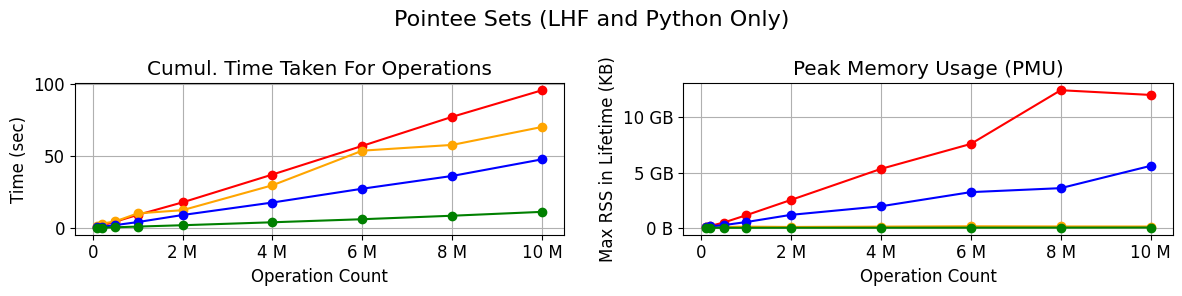

In [5]:
k1 = pd.read_csv("r1_uni_closedworld.csv")
k2 = pd.read_csv("r2_uni_closedworld.csv")
k3 = pd.read_csv("r3_uni_closedworld.csv")
a = (k1 + k2 + k3) / 3

m1 = pd.read_csv("r1_opt_closedworld.csv")
m2 = pd.read_csv("r2_opt_closedworld.csv")
m3 = pd.read_csv("r3_opt_closedworld.csv")
b = (m1 + m2 + m3) / 3

display(a)
display(b)
create_graph("Pointee Sets (LHF and Python Only)", a, b, "Operation Count", "optimistic_nonaive", legend = False)

,Operation Count,Operation Time Python,Overall Time Python,PMU Python,Operation Time LHF,Overall Time LHF,PMU LHF,Operation Count 2,Operation Time Naive,Overall Time Naive,PMU Naive
0,100000.0,949.893872,6.236667,1.353613e+05,1854.890000,8.706667,125504.000000,100000.0,1.245300e+04,22.200000,3.491707e+05
1,200000.0,1802.385012,13.230000,2.394240e+05,2774.203333,14.810000,152048.000000,200000.0,2.309000e+04,40.400000,6.398280e+05
2,500000.0,4587.162654,31.336667,4.763200e+05,4294.296667,33.493333,185096.000000,500000.0,5.808383e+04,99.400000,1.319332e+06
3,1000000.0,9495.742083,63.870000,1.352509e+06,5411.990000,64.230000,188337.333333,1000000.0,1.196443e+05,208.866667,3.900689e+06
4,2000000.0,18815.278610,121.833333,2.380691e+06,6938.126667,120.276667,179828.000000,2000000.0,2.327990e+05,404.783333,6.904664e+06
5,4000000.0,38407.107989,247.703333,3.879535e+06,9833.573333,234.423333,160285.333333,4000000.0,4.661223e+05,798.860000,1.120509e+07
6,6000000.0,58872.894446,374.443333,5.803536e+06,15691.333333,349.393333,208830.666667,6000000.0,6.969190e+05,1197.383333,1.666281e+07
7,8000000.0,83298.211575,562.716667,1.177038e+07,18746.000000,496.760000,220572.000000,8000000.0,9.928807e+05,1755.906667,3.479279e+07
8,10000000.0,99477.763414,639.203333,1.165757e+07,21327.200000,565.523333,194009.333333,10000000.0,1.131480e+06,1975.273333,3.405932e+07


,Operation Count,Operation Time Python,Overall Time Python,PMU Python,Operation Time LHF,Overall Time LHF,PMU LHF,Operation Count 2,Operation Time Naive,Overall Time Naive,PMU Naive
0,100000.0,425.293366,3.586667,6.537467e+04,124.912000,3.650000,17958.666667,100000.0,6046.996667,11.306667,1.478027e+05
1,200000.0,866.147836,7.420000,1.262680e+05,236.566667,6.573333,17629.333333,200000.0,11222.500000,20.656667,3.085360e+05
2,500000.0,2265.327533,17.473333,2.988347e+05,558.342333,16.100000,20505.333333,500000.0,27752.566667,50.383333,7.888280e+05
3,1000000.0,4572.113355,33.680000,5.230347e+05,1007.786000,30.893333,22222.666667,1000000.0,54262.066667,97.216667,1.390508e+06
4,2000000.0,9464.056730,66.950000,1.001613e+06,1905.676667,61.756667,23648.000000,2000000.0,108798.000000,194.760000,2.694163e+06
5,4000000.0,19979.983250,143.606667,3.174544e+06,3784.910000,129.330000,34366.666667,4000000.0,231397.000000,428.350000,8.528048e+06
6,6000000.0,29155.498187,207.880000,4.455981e+06,5552.046667,182.280000,38345.333333,6000000.0,325483.333333,606.590000,1.185736e+07
7,8000000.0,42493.753513,308.600000,6.877396e+06,7760.320000,271.760000,43464.000000,8000000.0,487161.000000,911.756667,1.898741e+07
8,10000000.0,48676.962376,324.786667,5.430620e+06,9273.673333,291.020000,49008.000000,10000000.0,508223.000000,930.990000,1.461166e+07


'optimistic_nonaive_pointsto.svg'

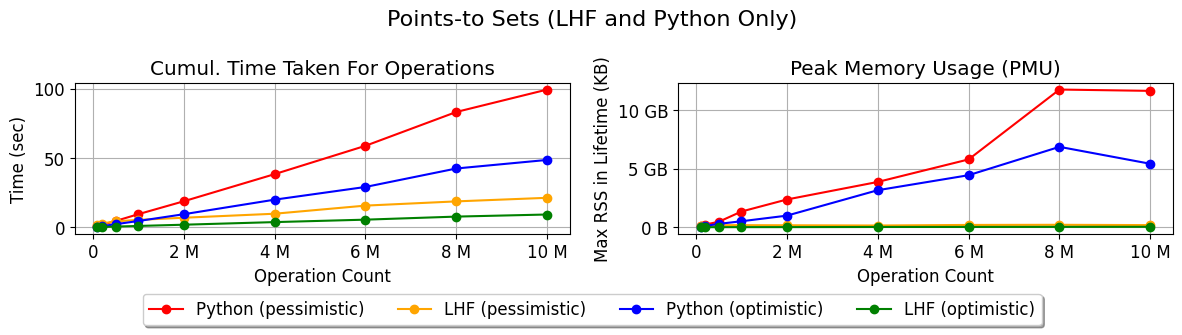

In [6]:
k1 = pd.read_csv("r1_uni_closedworld_pointsto.csv")
k2 = pd.read_csv("r2_uni_closedworld_pointsto.csv")
k3 = pd.read_csv("r3_uni_closedworld_pointsto.csv")
a = (k1 + k2 + k3) / 3

m1 = pd.read_csv("r1_opt_closedworld_pointsto.csv")
m2 = pd.read_csv("r2_opt_closedworld_pointsto.csv")
m3 = pd.read_csv("r3_opt_closedworld_pointsto.csv")
b = (m1 + m2 + m3) / 3

display(a)
display(b)

create_graph("Points-to Sets (LHF and Python Only)", a, b, "Operation Count", "optimistic_nonaive_pointsto")

'optimistic.svg'

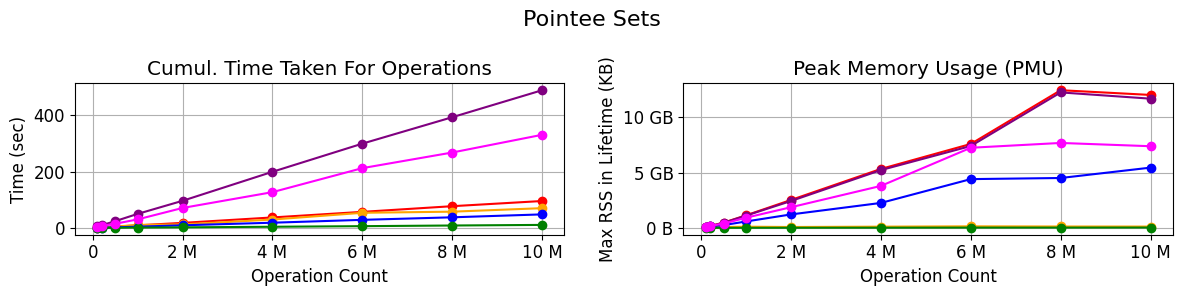

In [7]:
k1 = pd.read_csv("r1_uni_closedworld.csv")
k2 = pd.read_csv("r2_uni_closedworld.csv")
k3 = pd.read_csv("r3_uni_closedworld.csv")
a = (k1 + k2 + k3) / 3

m1 = pd.read_csv("r1_opt_closedworld.csv")
m2 = pd.read_csv("r2_opt_closedworld.csv")
m2 = pd.read_csv("r3_opt_closedworld.csv")
b = (m1 + m2 + m3) / 3

create_graph_naive("Pointee Sets", a, b, "Operation Count", "optimistic", legend = False)

'optimistic_pointsto.svg'

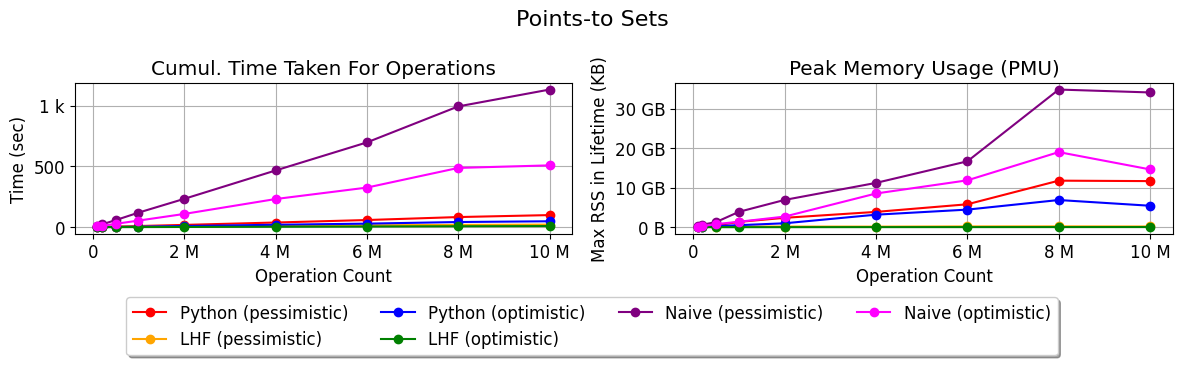

In [8]:
k1 = pd.read_csv("r1_uni_closedworld_pointsto.csv")
k2 = pd.read_csv("r2_uni_closedworld_pointsto.csv")
k3 = pd.read_csv("r3_uni_closedworld_pointsto.csv")
a = (k1 + k2 + k3) / 3

m1 = pd.read_csv("r1_opt_closedworld_pointsto.csv")
m2 = pd.read_csv("r2_opt_closedworld_pointsto.csv")
m3 = pd.read_csv("r3_opt_closedworld_pointsto.csv")
b = (m1 + m2 + m3) / 3

create_graph_naive("Points-to Sets", a, b, "Operation Count", "optimistic_pointsto")

In [9]:
k1 = pd.read_csv("r1_uni_closedworld_pointsto.csv")
k2 = pd.read_csv("r2_uni_closedworld_pointsto.csv")
k3 = pd.read_csv("r3_uni_closedworld_pointsto.csv")
a = (k1 + k2 + k3) / 3

m1 = pd.read_csv("r1_opt_closedworld_pointsto.csv")
m2 = pd.read_csv("r2_opt_closedworld_pointsto.csv")
m3 = pd.read_csv("r3_opt_closedworld_pointsto.csv")
b = (m1 + m2 + m3) / 2

print("TIME RATIO FOR PESSIMISTIC CASE (POINTS-TO SETS):")
a["Ratio"] = a["Operation Time Python"] / a["Operation Time LHF"]
display(a[["Operation Count", "Ratio"]])
print("TIME RATIO FOR COMPARATIVELY OPTIMISTIC CASE (POINTS-TO SETS):")
b["Ratio"] = b["Operation Time Python"] / b["Operation Time LHF"]
display(b[["Operation Count", "Ratio"]])

TIME RATIO FOR PESSIMISTIC CASE (POINTS-TO SETS):


,Operation Count,Ratio
0,100000.0,0.512103
1,200000.0,0.649695
2,500000.0,1.068199
3,1000000.0,1.754575
4,2000000.0,2.711867
5,4000000.0,3.905712
6,6000000.0,3.751937
7,8000000.0,4.443519
8,10000000.0,4.664361


TIME RATIO FOR COMPARATIVELY OPTIMISTIC CASE (POINTS-TO SETS):


,Operation Count,Ratio
0,150000.0,3.404744
1,300000.0,3.661327
2,750000.0,4.057238
3,1500000.0,4.536790
4,3000000.0,4.966245
5,6000000.0,5.278853
6,9000000.0,5.251306
7,12000000.0,5.475773
8,15000000.0,5.248941


In [10]:
k1 = pd.read_csv("r1_uni_closedworld.csv")
k2 = pd.read_csv("r2_uni_closedworld.csv")
k3 = pd.read_csv("r3_uni_closedworld.csv")
a = (k1 + k2 + k3) / 3

m1 = pd.read_csv("r1_opt_closedworld.csv")
m2 = pd.read_csv("r2_opt_closedworld.csv")
m3 = pd.read_csv("r3_opt_closedworld.csv")
b = (m1 + m2 + m3) / 3

print("TIME RATIO FOR PESSIMISTIC CASE (POINTEE SETS):")
a["Ratio"] = a["Operation Time Python"] / a["Operation Time LHF"]
display(a[["Operation Count", "Ratio"]])
print("TIME RATIO FOR COMPARATIVELY OPTIMISTIC CASE (POINTE SETS):")
b["Ratio"] = b["Operation Time Python"] / b["Operation Time LHF"]
display(b[["Operation Count", "Ratio"]])

TIME RATIO FOR PESSIMISTIC CASE (POINTEE SETS):


,Operation Count,Ratio
0,100000.0,0.501334
1,200000.0,0.564853
2,500000.0,0.957596
3,1000000.0,0.895511
4,2000000.0,1.437905
5,4000000.0,1.251345
6,6000000.0,1.062039
7,8000000.0,1.338220
8,10000000.0,1.363206


TIME RATIO FOR COMPARATIVELY OPTIMISTIC CASE (POINTE SETS):


,Operation Count,Ratio
0,100000.0,3.073317
1,200000.0,3.513797
2,500000.0,4.021942
3,1000000.0,4.100697
4,2000000.0,4.652805
5,4000000.0,4.432559
6,6000000.0,4.464907
7,8000000.0,4.231323
8,10000000.0,4.248388


In [11]:
k1 = pd.read_csv("r1_uni_closedworld_pointsto.csv")
k2 = pd.read_csv("r2_uni_closedworld_pointsto.csv")
k3 = pd.read_csv("r3_uni_closedworld_pointsto.csv")
a = (k1 + k2 + k3) / 3

m1 = pd.read_csv("r1_opt_closedworld_pointsto.csv")
m2 = pd.read_csv("r2_opt_closedworld_pointsto.csv")
m3 = pd.read_csv("r3_opt_closedworld_pointsto.csv")
b = (m1 + m2 + m3) / 3

print("MEMORY RATIO FOR PESSIMISTIC CASE (POINTS-TO SETS):")
a["Ratio"] = a["PMU Python"] / a["PMU LHF"]
display(a[["Operation Count", "Ratio"]])
print("MEMORY RATIO FOR COMPARATIVELY OPTIMISTIC CASE (POINTS-TO SETS):")
b["Ratio"] = b["PMU Python"] / b["PMU LHF"]
display(b[["Operation Count", "Ratio"]])

MEMORY RATIO FOR PESSIMISTIC CASE (POINTS-TO SETS):


,Operation Count,Ratio
0,100000.0,1.078542
1,200000.0,1.574661
2,500000.0,2.573367
3,1000000.0,7.181313
4,2000000.0,13.238710
5,4000000.0,24.203928
6,6000000.0,27.790631
7,8000000.0,53.363002
8,10000000.0,60.087687


MEMORY RATIO FOR COMPARATIVELY OPTIMISTIC CASE (POINTS-TO SETS):


,Operation Count,Ratio
0,100000.0,3.640285
1,200000.0,7.162381
2,500000.0,14.573509
3,1000000.0,23.536089
4,2000000.0,42.355097
5,4000000.0,92.372764
6,6000000.0,116.206614
7,8000000.0,158.232008
8,10000000.0,110.810888


In [12]:
k1 = pd.read_csv("r1_uni_closedworld.csv")
k2 = pd.read_csv("r2_uni_closedworld.csv")
k3 = pd.read_csv("r3_uni_closedworld.csv")
a = (k1 + k2 + k3) / 3

m1 = pd.read_csv("r1_opt_closedworld.csv")
m2 = pd.read_csv("r2_opt_closedworld.csv")
m3 = pd.read_csv("r3_opt_closedworld.csv")
b = (m1 + m2 + m3) / 3

print("MEMORY RATIO FOR PESSIMISTIC CASE (POINTEE SETS):")
a["Ratio"] = a["PMU Python"] / a["PMU LHF"]
display(a[["Operation Count", "Ratio"]])
print("MEMORY RATIO FOR COMPARATIVELY OPTIMISTIC CASE (POINTEE SETS):")
b["Ratio"] = b["PMU Python"] / a["PMU LHF"]
display(b[["Operation Count", "Ratio"]])

MEMORY RATIO FOR PESSIMISTIC CASE (POINTEE SETS):


,Operation Count,Ratio
0,100000.0,2.210995
1,200000.0,2.251441
2,500000.0,5.906146
3,1000000.0,9.915568
4,2000000.0,29.204302
5,4000000.0,45.489142
6,6000000.0,51.620585
7,8000000.0,94.821452
8,10000000.0,95.978161


MEMORY RATIO FOR COMPARATIVELY OPTIMISTIC CASE (POINTEE SETS):


,Operation Count,Ratio
0,100000.0,1.073837
1,200000.0,1.826437
2,500000.0,3.082084
3,1000000.0,4.570802
4,2000000.0,13.636401
5,4000000.0,16.669197
6,6000000.0,21.992706
7,8000000.0,27.373029
8,10000000.0,44.783997


'random.svg'

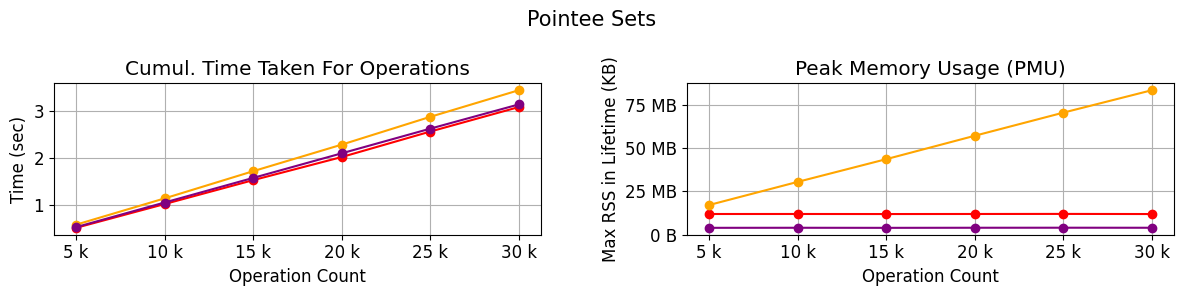

In [13]:
k1 = pd.read_csv("r1_random.csv")
k2 = pd.read_csv("r2_random.csv")
k3 = pd.read_csv("r3_random.csv")
a = (k1 + k2 + k3) / 3

create_graph_random("Pointee Sets", a, "Operation Count", "random", legend = False)

'random_pointsto.svg'

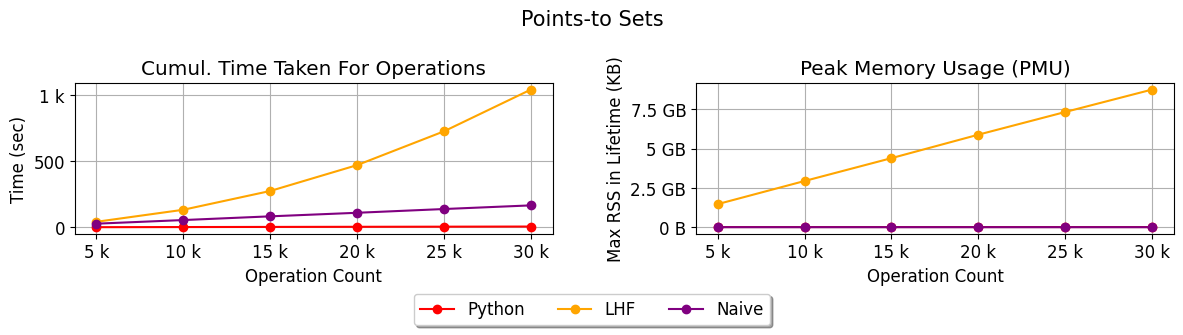

In [14]:
k1 = pd.read_csv("r1_random_pointsto.csv")
k2 = pd.read_csv("r2_random_pointsto.csv")
k3 = pd.read_csv("r3_random_pointsto.csv")
a = (k1 + k2 + k3) / 3

create_graph_random("Points-to Sets", a, "Operation Count", "random_pointsto")